In [150]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Multi-armed bandits for portfolio allocation

<img src="multi-armed_bandit.jpeg" width=600 height=600 /> 
<p>Image from <a href=https://www.bibblio.org/>bibblio</a></p>

### Bandits 

Bandits are a reinforcement learning framework based on using experimentation to find the best possible course of actions. One of the key aspects of bandits in general is the idea of *evaluative* feedback, rather than instructive feedback. Where instructive feedback focuses on the "best" action to take at any given state, evaluative feedback assigns a score to the agent's choice. Thus, instead of attempting to find the optimal choice, the agent aims to maximize their expected score. 

The reward is computed after an action taken and so the agent doesn't know what reward it's getting until after it tries an action. How to define reward is context-dependent.

In a bandits setting, the environment is *stochastic*, which means it is subject to randomness. Thus, the agent must adaptively select actions, with the goal of spending more time doing good actions and finding good actions, and less time doing bad actions.

This is not a tutorial on bandits in general. For the purposes of following this tutorial, you only need the understanding of how bandits are a reinforcement learning framework that relies heavily on exploration and exploitation, which are explained below.

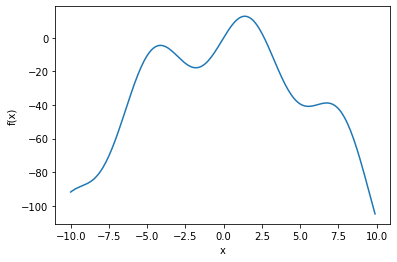

In [46]:
def f(x):
    return 15*np.sin(x) - x**2

# Plot random data
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(-10, 10, .1)
ax.plot(x, f(x))
ax.set_xlabel("x")
ax.set_ylabel("f(x)");

In a trivial example of optimization, say the algorithm wishes to find the maximum point of the above plot. Clearly, we can see that the center peak contains the highest point. However, the agent does not know this and must explore the terrain to find that point. Exploration

### Multi-Armed Bandits

The K-armed bandit problem can be summarized as follows: you are faced with n slot machines, each of which that pays out according to a probability distribution. For simplicity, let's say each machine pays out randomly from a normal distribution, where the expected return (mean) and variance of each distribution is different. At each time step, you pull a slot machine and receive a reward. Over many time steps, you keep track of what rewards you have received from each machine. From these experimental pulls, you gain an idea of which machines will pay out the most and so you aim to pull those machines more often. You never know which machine *actually* has the greatest expected return, but the more you play, the better an estimate you get.

The exploration-exploitation balance comes in when you must make a decision on whether to pull the machine that has given the best returns so far, or try a new machine in the hopes of obtaining a greater expected reward. Thus, the epsilon value chosen to account for this trade-off is an extremely important aspect of the problem. **Exploration** refers to pulling a machine that hasn't been pulled as often in order to obtain more information and therefore a better estimate of the machine's true expected return. **Exploitation** refers to pulling the machine that has seen the best results so far in an effort to maximize your future returns.

When applied to portfolio selection, the problem gets more complicated. You see, the experiment described above assumes *stationary* probability distributions, that is they do not change throughout your many time steps. However, the markets are *nonstationary*, which means that the expected return from a stock at one point in time will be different from the expected return of that stock at a different point in time. The expected value of a stock as well as the stock's variability changes as time goes on. 

### Applications of Contextual Bandits

Contextual bandits are appearing more and more often in real world applications. The use of contextual bandits for reinforcement learning in industry is increasing as it's an extremely useful framework. By "contextual" we mean that the algorithm is using real world information that it observes as a context for its decision.

Examples:

1. Doctor selecting treatments for patients. 
    Each treatment is a "play" of the machine, and how quickly/if the patient gets better is the reward. The doctor does not know if the patient will get better prior to his action, and will (hopefully) continue to give treatments that have worked before to new patients.
    In this instance, the context refers to the medical history of the patient (indicating how they will respond to certain treatment), the actions relate to the potential treatments, and the reward represents the outcome (success or failure).
    

2. Website advertisement recommendation. 
    Every time a user comes to a website, the website must decide which ads to choose to play to the user. Given the user's information and demographic, the website may want to target the consumer with certain ads that the user is more likely to click on. In this case, the problem can be formulated as a contextual bandits problem as an "agent" chooses and experiments with ads to play to the user.
    In this example, the context means the user's demographic and browsing information, the actions consist of comparing the ads to potentially play, and the reward is based on whether or not the user clicks on the ad.
    
    
3. Portfolio Optimization.
    



#### Formalization of the learning problem

for t in 1:T
    1. Observe the current state
    1b. Reward vector is calculated based on the current state
    2. Learner chooses an action a_t from {1....K}
    3. Learner receives reward based on action r_t(a_t)

Goal: maximize sum of rewards $\sum{r_t}$
Learner wants a good policy - makes good decisions to maximize reward

Policy: function that maps context -> action

Before learning, must choose form of policies to be used - policy space

The assumption is that there is a policy that will give maximum reward. The idea is to find a policy that operates as close as possible to this ideal policy. 

Some challenges are that the policy space can be extremely large! Computational efficiency becomes a factor here. Furthermore, upon selecting an action, only the rewards for policies that choose that action are seen. The agent does not know what would have happened given a different choice at the previous time step.

Sources:

https://arxiv.org/pdf/1904.10040.pdf


In [48]:
# convert to pdf without code blocks
#!jupyter nbconvert --to pdf --TemplateExporter.exclude_input=True Bandits_Tutorial.ipynb

[NbConvertApp] Converting notebook Bandits_Tutorial.ipynb to pdf
[NbConvertApp] Support files will be in Bandits_Tutorial_files/
[NbConvertApp] Making directory ./Bandits_Tutorial_files
[NbConvertApp] Writing 32698 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 56362 bytes to Bandits_Tutorial.pdf


### Action-Value Estimates

As part of the implementation of using contextual bandits in a finance application, we must find a way to define action-value methods. That is, we need a concrete formula to determine and update the value of each action we could take at each time step. This is where action-value methods come in.

## Epsilon-Greedy Algorithm for Multi-Armed Bandits

The epsilon-greedy algorithm is a very common, simple algorithm that attacks the multi-armed bandit problem in a straightforward way. It is the algorithm we will start with because it is easy to understand, simple to implement, and can work fairly well and give the reader an intuition about how to go about the problem. Furthermore, it provides a way of balancing the exploration-exploitation tradeoff.

Here's how it works:
A hyperparameter, called epsilon, is chosen. Epsilon is a real number in between 0 and 1 that represents the probability of choosing the current best option. At each time step, a number is drawn randomly from the uniform distribution between 0 and 1. If that number is greater than or equal to epsilon (which will happen with probability 1 - epsilon), then the **greedy** action will be chosen, which means whichever action has the greatest expected reward *at that timestep*. So, this greedy action may change (and probabily will) as time goes on. If the random number is less than epsilon, then an action will be chosen at random uniformly from all the actions. Thus, the greedy action may still be chosen even if the random draw is greater than epsilon, which is why low values of epsilon ( < 0.1) are often chosen. An epsilon value of 0.5 leads to the greedy action being chosen more than 50% of the time, which is why epsilon is so low.

Visual example below: In this example, there are K arms (actions), and the path demonstrates the possible values based on a value for epsilon.

<img src="eps-greedy.png" width=300 height=300 />

In [208]:
def run_epsilon_greedy(arms, epsilon, timesteps, decay_eps=False):
    
    # Initialize Q and N values to 0
    Q = [0 for j in range(len(arms))]
    N = [0 for j in range(len(arms))]
    R = []

    for i in range(timesteps):
        
        if decay_eps:
            if i % int(timesteps/10) == 0 and epsilon - (eps/10) != 0:
                epsilon -= (eps/10)
        
        # Choose random action based on epsilon value
        random_draw = np.random.uniform(low=0, high=1)

        if random_draw >= epsilon:
            # Choose greedy action - greatest current expected reward
            action = np.argmax(Q)
        else:
            # Choose randomly from other actions
            action = int(np.random.uniform(high = len(arms)))

        random_reward = np.random.normal(arms[action], 1)
        R.append(random_reward)
        N[action] += 1
        Q[action] = Q[action] + (1/N[action]) * (random_reward - Q[action])
    
    return Q, N, R

In [178]:
K = 10 # Number of arms
epsilon = 0.1
timesteps = 1000
runs = 2000

rewards = np.zeros((runs, timesteps))

for run in range(runs):
    np.random.seed(run)
    arms = [np.random.normal(0, 1) for i in range(K)]

    # Run algorithm
    Q, N, R = run_epsilon_greedy(arms, epsilon, timesteps)

    rewards[run] = R
%time

In [185]:
K = 10 # Number of arms
epsilon = 0.01
timesteps = 1000
runs = 2000

rewards2 = np.zeros((runs, timesteps))

for run in range(runs):
    np.random.seed(run)
    arms = [np.random.normal(0, 1) for i in range(K)]

    # Run algorithm
    Q, N, R = run_epsilon_greedy(arms, epsilon, timesteps)

    rewards2[run] = R
%time

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


In [192]:
K = 10 # Number of arms
epsilon = 0
timesteps = 1000
runs = 2000

rewards3 = np.zeros((runs, timesteps))

for run in range(runs):
    np.random.seed(run)
    arms = [np.random.normal(0, 1) for i in range(K)]

    # Run algorithm
    Q, N, R = run_epsilon_greedy(arms, epsilon, timesteps)

    rewards3[run] = R
%time

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.2 µs


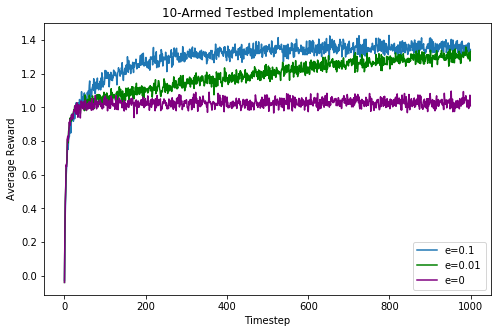

In [197]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

ax.set_xlabel("Timestep")
ax.set_ylabel("Average Reward")
ax.set_title("10-Armed Testbed Implementation")
ax.plot(np.mean(rewards, axis=0), label = "e=0.1");
ax.plot(np.mean(rewards2, axis=0), label="e=0.01", color = 'green');
ax.plot(np.mean(rewards3, axis=0), label="e=0", color = 'purple');

ax.legend();

Greater epsilon = more exploration: chooses other actions

Smaller epsilon = more exploitation and greeder: chooses the best action

As we can see, the epsilon = 0.1 value fared the best overall and was able to much more quickly find and choose the optimal value than the other two epsilon values. The epsilon = 0.01 run explored much less and so took longer to find and exploit the optimal value. However, it caught up to the epsilon = 0.1 value as time went on. The completely greedy option (epsilon = 0) stayed put and so did not find the optimal value.

Now we try a version that modifies the epsilon value over time by decreasing it as timesteps increase. Thus, the algorithm explores less and exploits more as time goes on.

In [203]:
K = 10 # Number of arms
epsilon = 0.2
timesteps = 1000
runs = 2000

rewards4 = np.zeros((runs, timesteps))

for run in range(runs):
    np.random.seed(run)
    arms = [np.random.normal(0, 1) for i in range(K)]

    # Run algorithm
    Q, N, R = run_epsilon_greedy_modified(arms, epsilon, timesteps, decay_eps=True)

    rewards4[run] = R
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


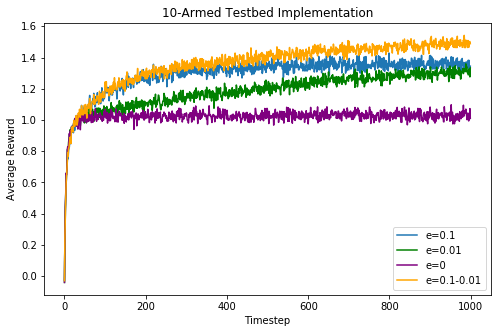

In [206]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

ax.set_xlabel("Timestep")
ax.set_ylabel("Average Reward")
ax.set_title("10-Armed Testbed Implementation")
ax.plot(np.mean(rewards, axis=0), label = "e=0.1");
ax.plot(np.mean(rewards2, axis=0), label="e=0.01", color = 'green');
ax.plot(np.mean(rewards3, axis=0), label="e=0", color = 'purple');
ax.plot(np.mean(rewards4, axis=0), label="e=0.1-0.01", color = 'orange');

ax.legend();

Here, we find that a modified epsilon that decreases at a rate of 0.01 every 100 timesteps does even better than our 0.1 value did.

Note that both convergence conditions are met for the sample-average case, ↵n(a) = 1
n ,
but not for the case of constant step-size parameter, ↵n(a) = ↵. In the latter case, the
second condition is not met, indicating that the estimates never completely converge but
continue to vary in response to the most recently received rewards. As we mentioned
above, this is actually desirable in a nonstationary environment, and problems that are
e↵ectively nonstationary are the most common in reinforcement learning

So, we are going to want to decay the stepsize paramter, which replaces 1 / N[action] in our algorithm

Other algorithms of interest: Thompson Sampling (Bayesian probability matching), Upper Confidence Bound, Gradient Bandits Algorithm (using softmax idea), 